In [125]:
#import python libraries
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
%matplotlib inline

In [126]:
#load data
df=pd.read_csv('aapl_stock_data.csv')

In [127]:
#Understanding data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.958030,691992000
1,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.967869,1096810400
2,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.976346,680433600
3,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.977103,705555200
4,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.048247,2227450400


In [128]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [129]:
df=df[['Date','Close']]

In [130]:
df.head()

,Date,Close
0,2005-01-03,1.130179
1,2005-01-04,1.141786
2,2005-01-05,1.151786
3,2005-01-06,1.152679
4,2005-01-07,1.236607


<Axes: >

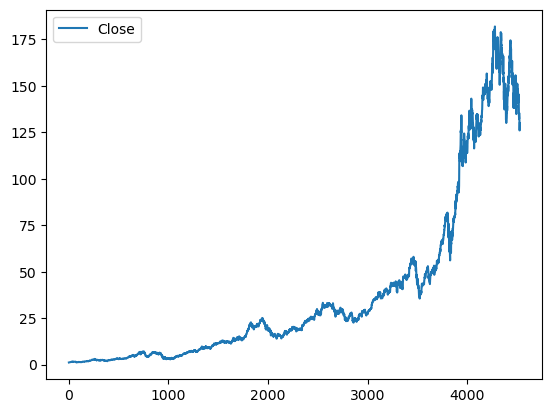

In [133]:
# Visualize the data
df.plot()

In [134]:
# Infomration about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4531 entries, 0 to 4530
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4531 non-null   object 
 1   Close   4531 non-null   float64
dtypes: float64(1), object(1)
memory usage: 70.9+ KB


In [135]:
# Get summary statistics 
df.describe()

,Close
count,4531.000000
mean,38.122239
std,45.531611
min,1.130179
25%,6.524464
50%,21.535713
75%,43.966251
max,182.009995


In [136]:
#Convert 'Date' to pandas date column format
df['Date']=pd.to_datetime(df['Date'])

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4531 entries, 0 to 4530
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4531 non-null   datetime64[ns]
 1   Close   4531 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 70.9 KB


In [138]:
# Make the date column as index
df.set_index('Date',inplace=True)

In [139]:
df.head()

,Close
Date,
2005-01-03,1.130179
2005-01-04,1.141786
2005-01-05,1.151786
2005-01-06,1.152679
2005-01-07,1.236607


<Axes: xlabel='Date'>

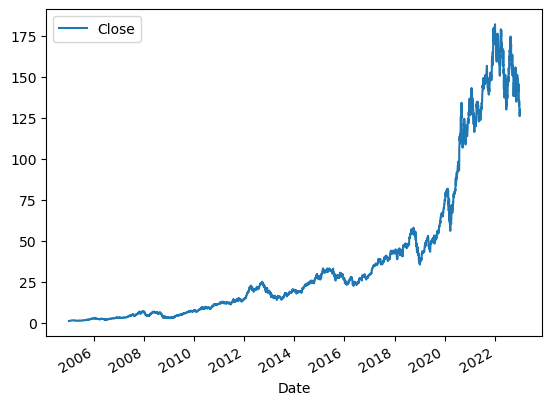

In [140]:
#Visualize the data
import matplotlib.pyplot as plt
df.plot()


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4531 entries, 2005-01-03 to 2022-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4531 non-null   float64
dtypes: float64(1)
memory usage: 70.8 KB


In [142]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [143]:
time_series = df['Close'].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.80)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]


In [144]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences)

seq_length = 10  # You can adjust this parameter based on the sequence length you want
X_train = create_sequences(train_data, seq_length)
y_train = train_data[seq_length:]

X_test = create_sequences(test_data, seq_length)
y_test = test_data[seq_length:]

In [145]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [146]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
113/113 [==============================] - 6s 28ms/step - loss: 0.0010
Epoch 2/10
113/113 [==============================] - 3s 27ms/step - loss: 2.1421e-05
Epoch 3/10
113/113 [==============================] - 3s 27ms/step - loss: 2.1818e-05
Epoch 4/10
113/113 [==============================] - 3s 26ms/step - loss: 1.9772e-05
Epoch 5/10
113/113 [==============================] - 3s 26ms/step - loss: 2.0379e-05
Epoch 6/10
113/113 [==============================] - 3s 31ms/step - loss: 2.0236e-05
Epoch 7/10
113/113 [==============================] - 3s 24ms/step - loss: 2.0459e-05
Epoch 8/10
113/113 [==============================] - 3s 25ms/step - loss: 2.0264e-05
Epoch 9/10
113/113 [==============================] - 3s 29ms/step - loss: 2.0832e-05
Epoch 10/10
113/113 [==============================] - 3s 29ms/step - loss: 1.9992e-05


In [147]:
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

29/29 [==============================] - 1s 8ms/step


In [148]:
r2 = r2_score(y_test_actual, predictions)
print(f'I am r squre of test data:{r2}')

I am r squre of test data:0.9729283057575753


Mean Squared Error: 40.53888117623996


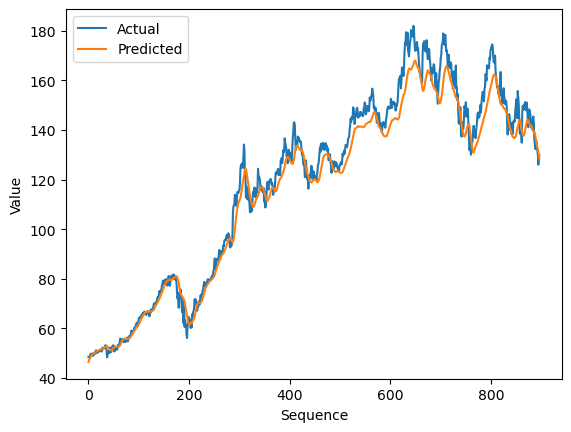

In [150]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_actual, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize the predictions vs. actual values
plt.plot( y_test_actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.xlabel('Sequence')
plt.ylabel('Value')
plt.show()

In [151]:
predictions = model.predict(X_train)

# Inverse transform the predictions and actual values to the original scale
predictions = scaler.inverse_transform(predictions)
y_train_actual = scaler.inverse_transform(y_train)

113/113 [==============================] - 1s 9ms/step


Mean Squared Error: 0.6369426453307407


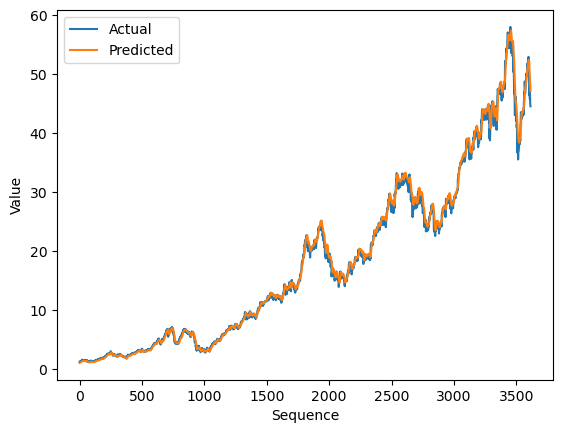

In [153]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train_actual, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize the predictions vs. actual values
plt.plot(y_train_actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.xlabel('Sequence')
plt.ylabel('Value')
plt.show()

In [154]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train_actual, predictions)

In [155]:
print(f'R score for train is:{r2}')

R score for train is:0.9969172838606932


In [ ]:
df.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/100
113/113 [==============================] - 5s 31ms/step - loss: 0.0038 - mae: 0.0507 - mse: 0.0038 - val_loss: 0.3409 - val_mae: 0.5475 - val_mse: 0.3409
Epoch 2/100
113/113 [==============================] - 3s 30ms/step - loss: 5.2086e-04 - mae: 0.0177 - mse: 5.2086e-04 - val_loss: 0.2997 - val_mae: 0.5117 - val_mse: 0.2997
Epoch 3/100
113/113 [==============================] - 3s 29ms/step - loss: 4.7690e-04 - mae: 0.0168 - mse: 4.7690e-04 - val_loss: 0.2586 - val_mae: 0.4758 - val_mse: 0.2586
Epoch 4/100
113/113 [==============================] - 3s 27ms/step - loss: 3.8671e-04 - mae: 0.0152 - mse: 3.8671e-04 - val_loss: 0.2014 - val_mae: 0.4209 - val_mse: 0.2014
Epoch 5/100
113/113 [==============================] - 3s 28ms/step - loss: 4.0844e-04 - mae: 0.0158 - mse: 4.0844e-04 - val_loss: 0.1435 - val_mae: 0.3540 - val_mse: 0.1435
Epoch 6/100
113/113 [==============================] - 3s 27ms/step - loss: 4.1087e-04 - mae: 0.0155 - mse: 4.1087e-04 - val_loss: 0.0893 

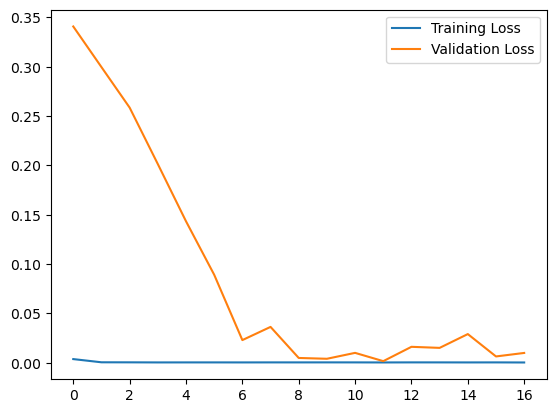

29/29 [==============================] - 0s 10ms/step - loss: 0.0017 - mae: 0.0344 - mse: 0.0017
Mean Squared Error on Test Set: 0.0016783789033070207
29/29 [==============================] - 1s 11ms/step


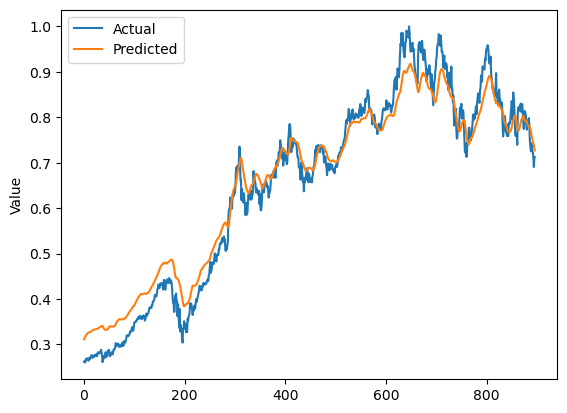

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Assuming you have X_train, y_train, X_test, y_test

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear'))
model.add(BatchNormalization())

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
eval_result = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {eval_result[0]}')

# Make predictions on the test set
predictions = model.predict(X_test)

# Visualize predictions
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.ylabel('Sequence')
plt.ylabel('Value')
plt.show()

In [46]:
# import yfinance as yf
# import pandas as pd

# def download_stock_data(ticker, start_date, end_date, save_path):
#     # Download historical stock data from Yahoo Finance
#     stock_data = yf.download(ticker, start=start_date, end=end_date)

#     # Save the data to a CSV file
#     stock_data.to_csv(save_path)
#     print(f'Stock data saved to {save_path}')

# # Example: Download historical data for Apple Inc. (AAPL) from 2022-01-01 to 2023-01-01
# ticker_symbol = "AAPL"
# start_date = "2005-01-01"
# end_date = "2023-01-01"
# csv_save_path = "aapl_stock_data.csv"

# download_stock_data(ticker_symbol, start_date, end_date, csv_save_path)



[*********************100%***********************]  1 of 1 completed
Stock data saved to aapl_stock_data.csv


In [48]:
#df2=pd.read_csv('aapl_stock_data.csv')

In [49]:
#df2.shape

(4531, 7)

In [75]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, model.predict(X_test))
print(f'my test score is:{r2}')

29/29 [==============================] - 0s 9ms/step
my test score is:0.9771264081080548


In [71]:
from sklearn.metrics import r2_score
print(r2_score(y_train, model.predict(X_train)))

113/113 [==============================] - 1s 7ms/step
0.6613338983064707


29/29 [==============================] - 0s 8ms/step


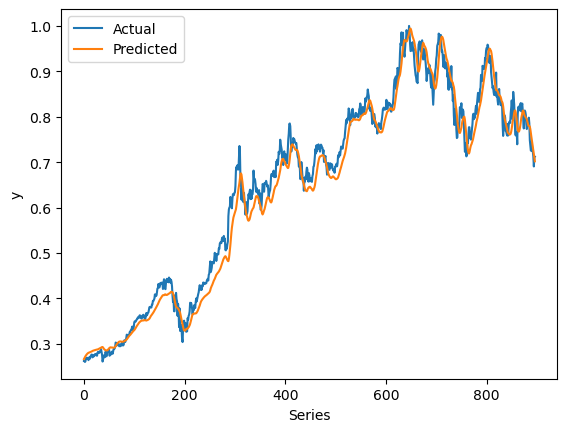

In [69]:
predictions = model.predict(X_test)

# Visualize predictions
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.xlabel('Series')
plt.ylabel('y')
plt.show()

113/113 [==============================] - 1s 7ms/step


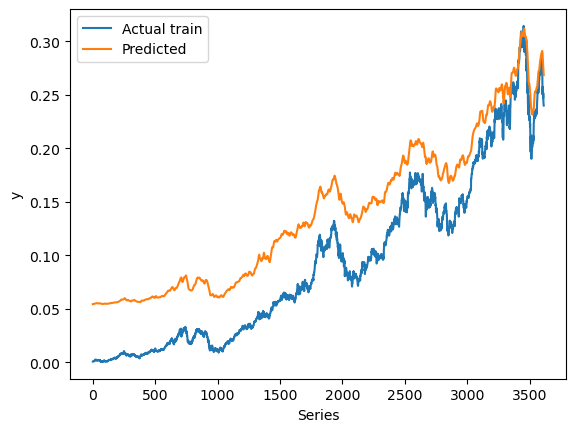

In [76]:
predictions = model.predict(X_train)

# Visualize predictions
plt.plot(y_train, label='Actual train')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.xlabel('Series')
plt.ylabel('y')
plt.show()

In [89]:
len(df.index)

4531